In [ ]:
import pandas as pd

In [ ]:
abm = pd.read_csv('abm.csv')
card = pd.read_csv('card.csv')
cheque = pd.read_csv('cheque.csv')
eft = pd.read_csv('eft.csv')
emt = pd.read_csv('emt.csv')
kyc = pd.read_csv('kyc.csv')
kyc_industry_codes = pd.read_csv('kyc_industry_codes.csv')
wire = pd.read_csv('wire.csv')

In [ ]:
print(abm.columns)
print(card.columns)
print(cheque.columns)
print(eft.columns)
print(emt.columns)
print(kyc.columns)
print(kyc_industry_codes.columns)
print(wire.columns)

Index(['abm_id', 'customer_id', 'amount_cad', 'debit_credit', 'cash_indicator',
       'country', 'province', 'city', 'transaction_date', 'transaction_time'],
      dtype='object')
Index(['card_trxn_id', 'customer_id', 'amount_cad', 'debit_credit',
       'merchant_category', 'ecommerce_ind', 'country', 'province', 'city',
       'transaction_date', 'transaction_time'],
      dtype='object')
Index(['cheque_id', 'customer_id', 'amount_cad', 'debit_credit',
       'transaction_date'],
      dtype='object')
Index(['eft_id', 'customer_id', 'amount_cad', 'debit_credit',
       'transaction_date', 'transaction_time'],
      dtype='object')
Index(['emt_id', 'customer_id', 'amount_cad', 'debit_credit',
       'transaction_date', 'transaction_time'],
      dtype='object')
Index(['customer_id', 'country', 'province', 'city', 'industry_code',
       'employee_count', 'sales', 'established_date', 'onboard_date'],
      dtype='object')
Index(['industry_code', 'industry'], dtype='object')
Index(['wi

In [ ]:
abm.isnull().sum()

,0
abm_id,0
customer_id,0
amount_cad,0
debit_credit,0
cash_indicator,0
country,1790
province,8598
city,1790
transaction_date,0
transaction_time,0


In [ ]:
abm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abm_id            20657 non-null  object 
 1   customer_id       20657 non-null  object 
 2   amount_cad        20657 non-null  float64
 3   debit_credit      20657 non-null  object 
 4   cash_indicator    20657 non-null  bool   
 5   country           18867 non-null  object 
 6   province          12059 non-null  object 
 7   city              18867 non-null  object 
 8   transaction_date  20657 non-null  object 
 9   transaction_time  20657 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
abm['transaction_time'] = pd.to_datetime(abm['transaction_time'])
abm['transaction_date'] = pd.to_datetime(abm['transaction_date'])

<ipython-input-349-1e5e70dd36fd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  abm['transaction_time'] = pd.to_datetime(abm['transaction_time'])


In [ ]:
abm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   abm_id            20657 non-null  object        
 1   customer_id       20657 non-null  object        
 2   amount_cad        20657 non-null  float64       
 3   debit_credit      20657 non-null  object        
 4   cash_indicator    20657 non-null  bool          
 5   country           18867 non-null  object        
 6   province          12059 non-null  object        
 7   city              18867 non-null  object        
 8   transaction_date  20657 non-null  datetime64[ns]
 9   transaction_time  20657 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
abm['amount_cad'].describe()

,amount_cad
count,20657.000000
mean,1792.433083
std,5536.860529
min,1.240000
25%,211.450000
50%,523.410000
75%,1068.490000
max,106909.650000


In [ ]:
abm['country'].value_counts(dropna=False)

,count
country,
CA,16825
other,2042
NaN,1790


In [ ]:
abm['abm_id'].duplicated().sum()

0

In [ ]:
abm.groupby('customer_id')['amount_cad'].sum()

,amount_cad
customer_id,
SYNCID0000000014,25.41
SYNCID0000000034,9714.75
SYNCID0000000038,104.55
SYNCID0000000046,22405.95
SYNCID0000000051,2305.29
...,...
SYNCID0000017163,401.17
SYNCID0000017168,4149.78
SYNCID0000017172,1084.56


In [ ]:
abm.groupby('customer_id')['amount_cad'].count()

,amount_cad
customer_id,
SYNCID0000000014,1
SYNCID0000000034,5
SYNCID0000000038,1
SYNCID0000000046,29
SYNCID0000000051,3
...,...
SYNCID0000017163,1
SYNCID0000017168,9
SYNCID0000017172,1


In [ ]:
abm.groupby('customer_id')['transaction_date'].min()

,transaction_date
customer_id,
SYNCID0000000014,2022-11-16
SYNCID0000000034,2022-11-14
SYNCID0000000038,2022-12-28
SYNCID0000000046,2022-11-07
SYNCID0000000051,2022-11-01
...,...
SYNCID0000017163,2022-11-02
SYNCID0000017168,2022-11-04
SYNCID0000017172,2022-12-15


In [ ]:
abm.groupby('customer_id')['transaction_date'].max()

,transaction_date
customer_id,
SYNCID0000000014,2022-11-16
SYNCID0000000034,2023-01-22
SYNCID0000000038,2022-12-28
SYNCID0000000046,2023-01-12
SYNCID0000000051,2023-01-17
...,...
SYNCID0000017163,2022-11-02
SYNCID0000017168,2023-01-22
SYNCID0000017172,2022-12-15


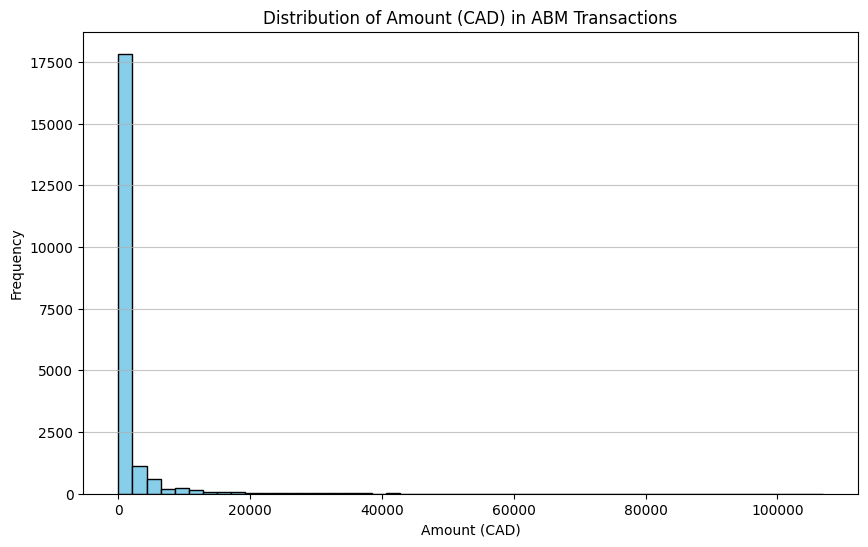

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of 'amount_cad'
plt.figure(figsize=(10, 6))
plt.hist(abm['amount_cad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Amount (CAD)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount (CAD) in ABM Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()

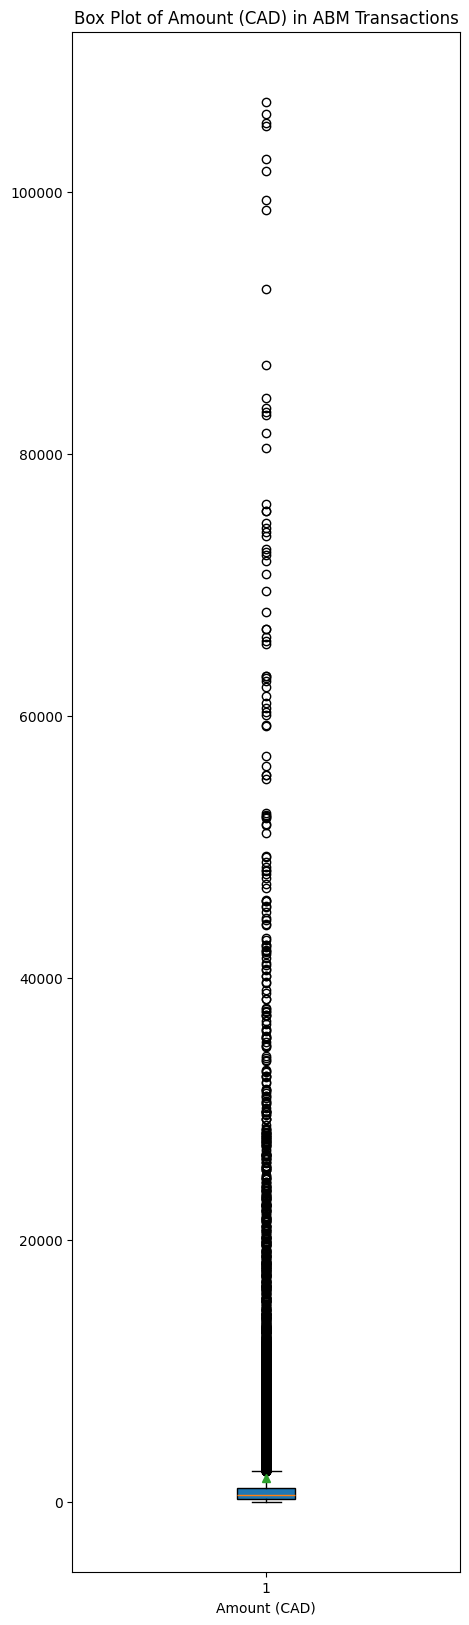

In [ ]:
# Create the box plot
plt.figure(figsize=(5, 20))
plt.boxplot(abm['amount_cad'], vert=True, patch_artist=True, showmeans=True)  # vert=False for horizontal boxplot
plt.xlabel('Amount (CAD)')
plt.title('Box Plot of Amount (CAD) in ABM Transactions')
plt.show()

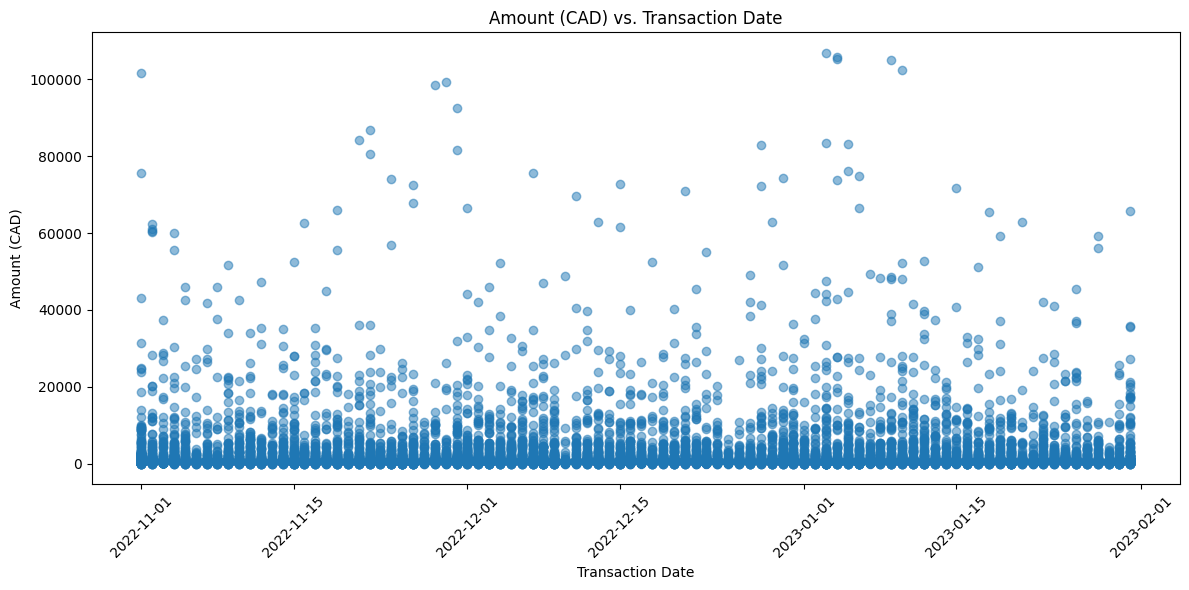

In [ ]:
# Scatter plot of 'amount_cad' vs. 'transaction_date'
plt.figure(figsize=(12, 6))
plt.scatter(abm['transaction_date'], abm['amount_cad'], alpha=0.5)
plt.xlabel('Transaction Date')
plt.ylabel('Amount (CAD)')
plt.title('Amount (CAD) vs. Transaction Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

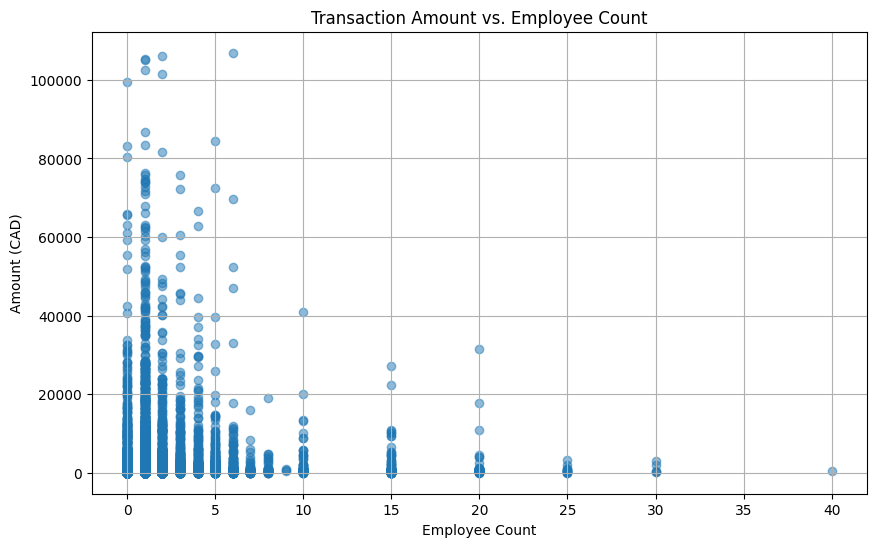

In [ ]:
# Merge the DataFrames
merged_df = pd.merge(abm, kyc, on='customer_id', how='left')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['employee_count'], merged_df['amount_cad'], alpha=0.5)
plt.xlabel('Employee Count')
plt.ylabel('Amount (CAD)')
plt.title('Transaction Amount vs. Employee Count')
plt.grid(True)
plt.show()

In [ ]:
kyc_industry_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_code  251 non-null    int64 
 1   industry       251 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [ ]:
kyc_industry_codes['industry_code'].value_counts(dropna=False)

,count
industry_code,
112,1
7749,1
7421,1
7511,1
7512,1
...,...
4569,1
4581,1
4589,1


In [ ]:
kyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16255 entries, 0 to 16254
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       16255 non-null  object 
 1   country           16255 non-null  object 
 2   province          12708 non-null  object 
 3   city              15856 non-null  object 
 4   industry_code     15867 non-null  object 
 5   employee_count    13817 non-null  float64
 6   sales             14467 non-null  float64
 7   established_date  13817 non-null  object 
 8   onboard_date      13655 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
kyc['industry_code'].describe()

,industry_code
count,15867
unique,252
top,other
freq,1935


In [ ]:
kyc['industry_code'].value_counts(dropna=False)

,count
industry_code,
other,1935
7215,1100
7771,768
4561,557
7292,517
...,...
0929,10
3192,9
3741,9


In [ ]:
kyc.loc[kyc['industry_code'] == 'other', 'industry_code'] = 100

In [ ]:
kyc['industry_code'].value_counts(dropna=False)

,count
industry_code,
100,1935
7215,1100
7771,768
4561,557
7292,517
...,...
0929,10
3192,9
3741,9


In [ ]:
kyc['industry_code'] = pd.to_numeric(kyc['industry_code']).astype('Int64')

In [ ]:
# Merge kyc_industry_codes with kyc on 'industry_code'
merged_kyc = pd.merge(kyc, kyc_industry_codes, on='industry_code', how='left')
print(merged_kyc)

            customer_id country province         city  industry_code  \
0      SYNCID0000000000      CA       ON   NORTH YORK           7292   
1      SYNCID0000000001      CA       ON   NORTH YORK           <NA>   
2      SYNCID0000000002      CA       ON    KITCHENER           7721   
3      SYNCID0000000004      CA      NaN        other           4565   
4      SYNCID0000000005      CA       BC     VICTORIA           7799   
...                 ...     ...      ...          ...            ...   
16250  SYNCID0000017178      CA       ON      TORONTO           7759   
16251  SYNCID0000017179      CA       ON   NORTH YORK           7771   
16252  SYNCID0000017180      CA      NaN        other            211   
16253  SYNCID0000017181      CA       ON  SCARBOROUGH           8661   
16254  SYNCID0000017182      CA       BC       NELSON           7215   

       employee_count      sales established_date onboard_date  \
0                 0.0        0.0       2019-06-22   2022-05-02   
1  

In [ ]:
kyc.isnull().sum()

,0
customer_id,0
country,0
province,3547
city,399
industry_code,388
employee_count,2438
sales,1788
established_date,2438
onboard_date,2600


In [ ]:
no_info=kyc[(kyc['employee_count'].isnull()) & (kyc['industry_code'].isnull())].customer_id

In [ ]:
print(kyc[kyc['employee_count'].isnull()]['industry_code'].value_counts(dropna=False))

industry_code
100     279
7215    168
7771    102
4561     86
8651     72
       ... 
3244      1
6532      1
9726      1
3971      1
9961      1
Name: count, Length: 234, dtype: Int64


In [ ]:
no_info

,customer_id
1,SYNCID0000000001
274,SYNCID0000000289
320,SYNCID0000000336
1062,SYNCID0000001115
1112,SYNCID0000001174
...,...
14750,SYNCID0000015597
14849,SYNCID0000015697
14878,SYNCID0000015727
15219,SYNCID0000016085


In [ ]:
amount_cad_no_info = abm[abm['customer_id'].isin(no_info)]['amount_cad']

In [ ]:
amount_cad_no_info.describe()

,amount_cad
count,49.000000
mean,1678.899592
std,4002.501367
min,20.990000
25%,268.080000
50%,437.890000
75%,1067.080000
max,26192.340000


In [ ]:
eft.isnull().sum()

,0
eft_id,0
customer_id,0
amount_cad,0
debit_credit,0
transaction_date,0
transaction_time,0


In [ ]:
eft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488562 entries, 0 to 488561
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eft_id            488562 non-null  object 
 1   customer_id       488562 non-null  object 
 2   amount_cad        488562 non-null  float64
 3   debit_credit      488562 non-null  object 
 4   transaction_date  488562 non-null  object 
 5   transaction_time  488562 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.4+ MB


In [ ]:
eft['transaction_time'] = pd.to_datetime(eft['transaction_time'])
eft['transaction_date'] = pd.to_datetime(eft['transaction_date'])

<ipython-input-379-23add2d7445a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eft['transaction_time'] = pd.to_datetime(eft['transaction_time'])


In [ ]:
eft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488562 entries, 0 to 488561
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   eft_id            488562 non-null  object        
 1   customer_id       488562 non-null  object        
 2   amount_cad        488562 non-null  float64       
 3   debit_credit      488562 non-null  object        
 4   transaction_date  488562 non-null  datetime64[ns]
 5   transaction_time  488562 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 22.4+ MB


In [ ]:
eft['amount_cad'].describe()

,amount_cad
count,4.885620e+05
mean,5.632466e+03
std,6.911029e+04
min,0.000000e+00
25%,1.141225e+02
50%,4.895250e+02
75%,1.888250e+03
max,1.287454e+07


In [ ]:
eft['eft_id'].duplicated().sum()

0

In [ ]:
eft.groupby('customer_id')['amount_cad'].sum()

,amount_cad
customer_id,
SYNCID0000000005,165250.47
SYNCID0000000007,10913.02
SYNCID0000000009,38073.25
SYNCID0000000010,10618.27
SYNCID0000000011,96.40
...,...
SYNCID0000017176,124802.25
SYNCID0000017178,6069.14
SYNCID0000017179,1527518.35


In [ ]:
eft.groupby('customer_id')['amount_cad'].count()

,amount_cad
customer_id,
SYNCID0000000005,50
SYNCID0000000007,6
SYNCID0000000009,13
SYNCID0000000010,19
SYNCID0000000011,1
...,...
SYNCID0000017176,17
SYNCID0000017178,4
SYNCID0000017179,278


In [ ]:
average_amount_per_transaction = eft.groupby('customer_id')['amount_cad'].mean()

average_amount_per_transaction

,amount_cad
customer_id,
SYNCID0000000005,3305.009400
SYNCID0000000007,1818.836667
SYNCID0000000009,2928.711538
SYNCID0000000010,558.856316
SYNCID0000000011,96.400000
...,...
SYNCID0000017176,7341.308824
SYNCID0000017178,1517.285000
SYNCID0000017179,5494.670324


In [ ]:
customer_ids_above_threshold = average_amount_per_transaction[average_amount_per_transaction > 100000].index
len(customer_ids_above_threshold)

54

In [ ]:
merged_kyc

,customer_id,country,province,city,industry_code,employee_count,sales,established_date,onboard_date,industry
0,SYNCID0000000000,CA,ON,NORTH YORK,7292,0.0,0.0,2019-06-22,2022-05-02,"Estate, Trust and Agency Funds"
1,SYNCID0000000001,CA,ON,NORTH YORK,<NA>,NaN,66446.0,2009-07-21,2009-08-21,NaN
2,SYNCID0000000002,CA,ON,KITCHENER,7721,2.0,NaN,2022-04-11,2022-09-14,Computer Services
3,SYNCID0000000004,CA,NaN,other,4565,1.0,328160.0,2020-11-16,2022-12-08,Forest Products Trucking Industry
4,SYNCID0000000005,CA,BC,VICTORIA,7799,1.0,0.0,2022-01-21,2023-01-01,Other Business Services n.e.c.
...,...,...,...,...,...,...,...,...,...,...
16250,SYNCID0000017178,CA,ON,TORONTO,7759,1.0,0.0,2017-09-22,2017-12-02,Other Scientific and Technical Services
16251,SYNCID0000017179,CA,ON,NORTH YORK,7771,0.0,0.0,2013-06-22,2013-12-07,Management Consulting Services
16252,SYNCID0000017180,CA,NaN,other,211,NaN,1.0,1981-03-11,2017-11-30,Veterinary Services
16253,SYNCID0000017181,CA,ON,SCARBOROUGH,8661,20.0,4833395.0,2015-09-05,2015-09-14,Offices of Chiropractors and Osteopaths


In [ ]:
# Merge eft with merged_kyc based on customer_id
merged_eft_kyc = pd.merge(eft, merged_kyc, on='customer_id', how='left')
len(merged_eft_kyc)

488562

In [ ]:
above_100k = (merged_eft_kyc[merged_eft_kyc['customer_id'].isin(customer_ids_above_threshold)][['industry_code', 'industry', 'employee_count']])

In [ ]:
len(above_100k)

788

In [ ]:
average_amount_cad = merged_eft_kyc[merged_eft_kyc['customer_id'].isin(customer_ids_above_threshold)].groupby('customer_id')['amount_cad'].mean()
average_amount_cad

,amount_cad
customer_id,
SYNCID0000000094,1.498619e+05
SYNCID0000000484,2.533494e+05
SYNCID0000000617,1.548788e+05
SYNCID0000000764,4.782558e+05
SYNCID0000001578,5.427752e+05
SYNCID0000001706,1.627617e+05
SYNCID0000001833,1.872558e+05
SYNCID0000002256,1.149084e+05
SYNCID0000002257,1.792976e+05


In [ ]:
average_amount_cad = merged_eft_kyc[merged_eft_kyc['customer_id'].isin(customer_ids_above_threshold)].groupby('customer_id')['amount_cad'].mean()
average_amount_cad = average_amount_cad.reset_index()
#print(average_amount_cad)
final_df = pd.merge(average_amount_cad, merged_kyc[['customer_id', 'industry_code', 'industry', 'employee_count']], on='customer_id', how='left')
final_df

,customer_id,amount_cad,industry_code,industry,employee_count
0,SYNCID0000000094,1.498619e+05,7752,Offices of Engineers,2.0
1,SYNCID0000000484,2.533494e+05,9839,Other Professional Menbership Associations,2.0
2,SYNCID0000000617,1.548788e+05,7759,Other Scientific and Technical Services,NaN
3,SYNCID0000000764,4.782558e+05,9112,Motels,0.0
4,SYNCID0000001578,5.427752e+05,9211,"Restaurants, Licensed",NaN
5,SYNCID0000001706,1.627617e+05,<NA>,NaN,NaN
6,SYNCID0000001833,1.872558e+05,7799,Other Business Services n.e.c.,1.0
7,SYNCID0000002256,1.149084e+05,159,Fruit and Vegetable Combination Farms,1.0
8,SYNCID0000002257,1.792976e+05,4224,Concrete Pouring and Finishing,4.0
9,SYNCID0000002683,3.032966e+05,4561,General Freight Trucking Industry,1.0


In [ ]:
(final_df['industry'].value_counts(dropna=False))

,count
industry,
NaN,7
General Freight Trucking Industry,6
"Restaurants, Licensed",3
Holding Companies,2
Other Business Services n.e.c.,2
Fruit and Vegetable Combination Farms,2
Other Professional Menbership Associations,2
"Other Products n.e.c., Wholesale",2
Offices of Lawyers and Notaries,2


In [ ]:
common_industry_codes = merged_kyc['industry_code'][merged_kyc['industry'].isin(above_100k['industry'])]

if not common_industry_codes.empty:
    industry_code_counts = common_industry_codes.value_counts(dropna=False)
    print(industry_code_counts)
else:
    print("No matching industry codes found.")

industry_code
100     1935
7215    1100
7771     768
4561     557
4013     504
7761     395
<NA>     388
7799     305
8653     278
7759     223
8652     218
7611     197
6031     158
9211     156
7731     148
9861     131
7752     109
4219      97
8661      88
9799      85
9631      80
8665      68
141       64
5999      49
4226      33
9839      30
412       26
4278      26
9112      25
6541      23
4224      21
159       18
411       18
9114      15
3999      14
5231      11
Name: count, dtype: Int64


In [ ]:
industry_count = merged_kyc.groupby('industry_code')['customer_id'].count()

In [ ]:
industry_count

,customer_id
industry_code,
100,1935
112,61
115,15
119,15
122,31
...,...
9952,11
9953,144
9959,64


In [ ]:
final_df = pd.merge(final_df, industry_count, on='industry_code', how='left')

In [ ]:
final_df

,customer_id_x,amount_cad_x,industry_code,industry,employee_count,amount_cad_y,percentage_difference,customer_id_y
0,SYNCID0000000094,1.498619e+05,7752,Offices of Engineers,2.0,6393.409296,2244.005919,109.0
1,SYNCID0000000484,2.533494e+05,9839,Other Professional Menbership Associations,2.0,10649.911663,2278.887337,30.0
2,SYNCID0000000617,1.548788e+05,7759,Other Scientific and Technical Services,NaN,8115.926233,1808.332248,223.0
3,SYNCID0000000764,4.782558e+05,9112,Motels,0.0,6673.834502,7066.132176,25.0
4,SYNCID0000001578,5.427752e+05,9211,"Restaurants, Licensed",NaN,3647.342184,14781.388995,156.0
5,SYNCID0000001706,1.627617e+05,<NA>,NaN,NaN,NaN,NaN,NaN
6,SYNCID0000001833,1.872558e+05,7799,Other Business Services n.e.c.,1.0,5198.479769,3502.126262,305.0
7,SYNCID0000002256,1.149084e+05,159,Fruit and Vegetable Combination Farms,1.0,3694.092213,3010.600207,18.0
8,SYNCID0000002257,1.792976e+05,4224,Concrete Pouring and Finishing,4.0,20466.484459,776.054921,21.0
9,SYNCID0000002683,3.032966e+05,4561,General Freight Trucking Industry,1.0,7545.505602,3919.566088,557.0


In [ ]:
# Calculate the industry average transaction amount for EFT
industry_avg_eft = merged_eft_kyc.groupby('industry_code')['amount_cad'].mean()

In [ ]:
print(industry_avg_eft)

industry_code
100      5231.127180
112     10370.495865
115      3579.563233
119      3072.532955
122      3686.738066
            ...     
9952    15076.458492
9953     5777.969719
9959     7384.904224
9961     3111.932877
9999     5966.045037
Name: amount_cad, Length: 252, dtype: float64


In [ ]:
# Merge 'industry_avg_eft' with 'final_df' based on 'industry_code'
final_df = pd.merge(final_df, industry_avg_eft, on='industry_code', how='left')


In [ ]:
print(final_df)

       customer_id_x  amount_cad_x  industry_code  \
0   SYNCID0000000094  1.498619e+05           7752   
1   SYNCID0000000484  2.533494e+05           9839   
2   SYNCID0000000617  1.548788e+05           7759   
3   SYNCID0000000764  4.782558e+05           9112   
4   SYNCID0000001578  5.427752e+05           9211   
5   SYNCID0000001706  1.627617e+05           <NA>   
6   SYNCID0000001833  1.872558e+05           7799   
7   SYNCID0000002256  1.149084e+05            159   
8   SYNCID0000002257  1.792976e+05           4224   
9   SYNCID0000002683  3.032966e+05           4561   
10  SYNCID0000003016  6.267104e+05           8661   
11  SYNCID0000003211  1.462564e+05           6541   
12  SYNCID0000004413  2.509753e+05            100   
13  SYNCID0000004424  2.758670e+05            100   
14  SYNCID0000005579  1.163865e+05           4226   
15  SYNCID0000005729  1.287509e+05           4561   
16  SYNCID0000005977  1.228751e+05            159   
17  SYNCID0000006995  1.348135e+05            

In [ ]:
# Calculate the percentage difference
final_df['percentage_difference'] = ((final_df['amount_cad_x'] - final_df['amount_cad_y']) / final_df['amount_cad_y']) * 100

In [ ]:
final_df

,customer_id_x,amount_cad_x,industry_code,industry,employee_count,amount_cad_y,percentage_difference,customer_id_y,amount_cad
0,SYNCID0000000094,1.498619e+05,7752,Offices of Engineers,2.0,6393.409296,2244.005919,109.0,6393.409296
1,SYNCID0000000484,2.533494e+05,9839,Other Professional Menbership Associations,2.0,10649.911663,2278.887337,30.0,10649.911663
2,SYNCID0000000617,1.548788e+05,7759,Other Scientific and Technical Services,NaN,8115.926233,1808.332248,223.0,8115.926233
3,SYNCID0000000764,4.782558e+05,9112,Motels,0.0,6673.834502,7066.132176,25.0,6673.834502
4,SYNCID0000001578,5.427752e+05,9211,"Restaurants, Licensed",NaN,3647.342184,14781.388995,156.0,3647.342184
5,SYNCID0000001706,1.627617e+05,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
6,SYNCID0000001833,1.872558e+05,7799,Other Business Services n.e.c.,1.0,5198.479769,3502.126262,305.0,5198.479769
7,SYNCID0000002256,1.149084e+05,159,Fruit and Vegetable Combination Farms,1.0,3694.092213,3010.600207,18.0,3694.092213
8,SYNCID0000002257,1.792976e+05,4224,Concrete Pouring and Finishing,4.0,20466.484459,776.054921,21.0,20466.484459
9,SYNCID0000002683,3.032966e+05,4561,General Freight Trucking Industry,1.0,7545.505602,3919.566088,557.0,7545.505602


In [ ]:
above_100k['employee_count'].value_counts(dropna=False)

,count
employee_count,
1.0,281
NaN,161
2.0,132
0.0,85
5.0,46
4.0,45
3.0,15
10.0,13
60.0,10


In [ ]:
eft.groupby('customer_id')['transaction_date'].min()

,transaction_date
customer_id,
SYNCID0000000005,2022-11-01
SYNCID0000000007,2022-11-21
SYNCID0000000009,2022-11-01
SYNCID0000000010,2022-11-01
SYNCID0000000011,2022-12-01
...,...
SYNCID0000017176,2022-11-01
SYNCID0000017178,2022-11-04
SYNCID0000017179,2022-11-01


In [ ]:
eft.groupby('customer_id')['transaction_date'].max()

,transaction_date
customer_id,
SYNCID0000000005,2023-01-31
SYNCID0000000007,2023-01-18
SYNCID0000000009,2023-01-25
SYNCID0000000010,2023-01-31
SYNCID0000000011,2022-12-01
...,...
SYNCID0000017176,2023-01-31
SYNCID0000017178,2023-01-19
SYNCID0000017179,2023-01-31


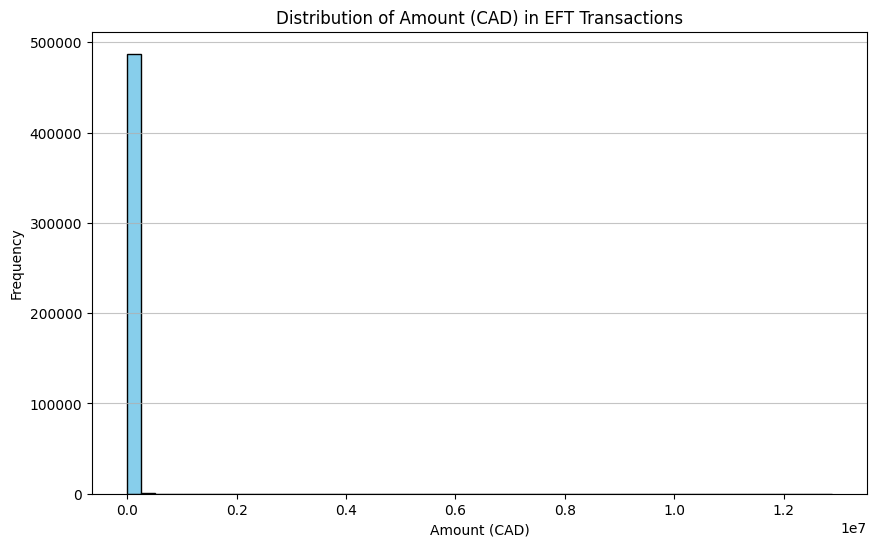

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of 'amount_cad'
plt.figure(figsize=(10, 6))
plt.hist(eft['amount_cad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Amount (CAD)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount (CAD) in EFT Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()

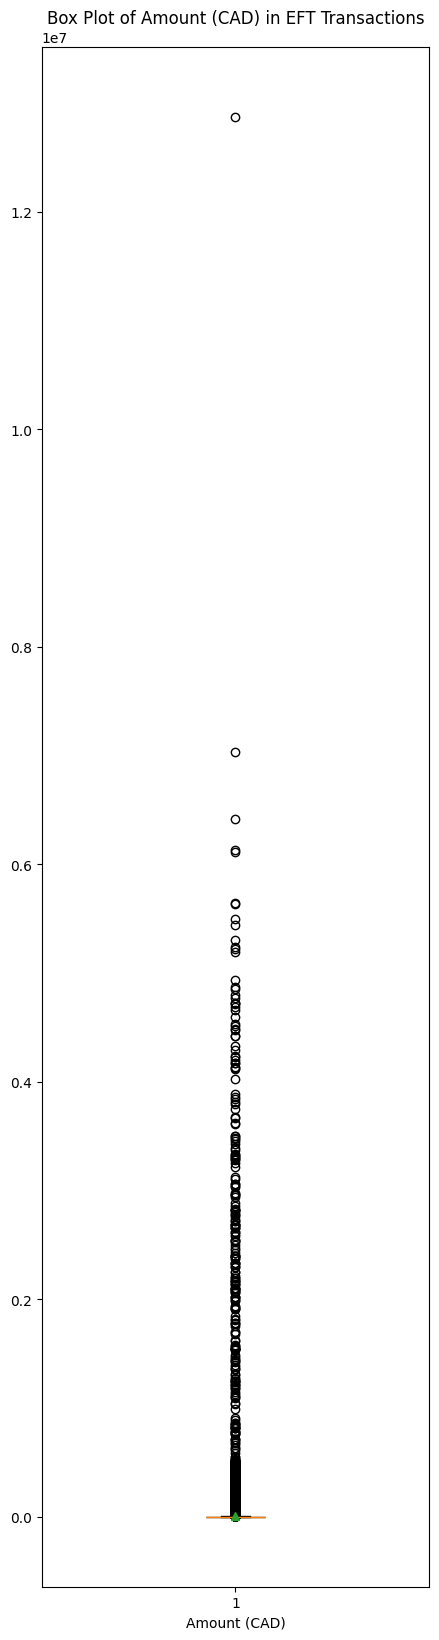

In [ ]:
# Create the box plot
plt.figure(figsize=(5, 20))
plt.boxplot(eft['amount_cad'], vert=True, patch_artist=True, showmeans=True)  # vert=False for horizontal boxplot
plt.xlabel('Amount (CAD)')
plt.title('Box Plot of Amount (CAD) in EFT Transactions')
plt.show()

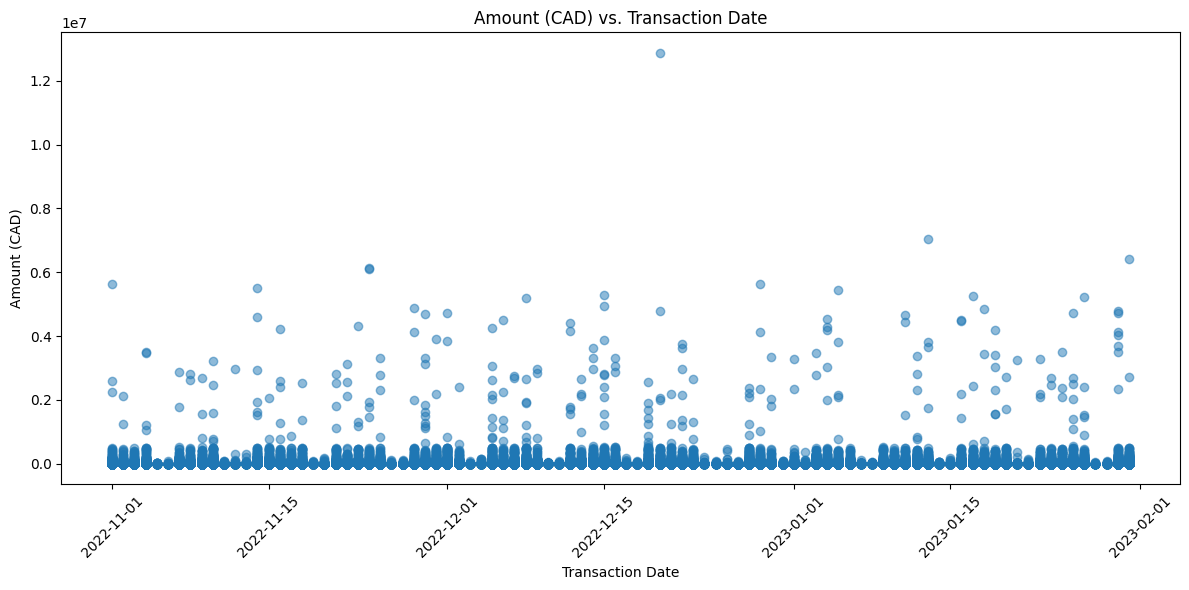

In [ ]:
# Scatter plot of 'amount_cad' vs. 'transaction_date'
plt.figure(figsize=(12, 6))
plt.scatter(eft['transaction_date'], eft['amount_cad'], alpha=0.5)
plt.xlabel('Transaction Date')
plt.ylabel('Amount (CAD)')
plt.title('Amount (CAD) vs. Transaction Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

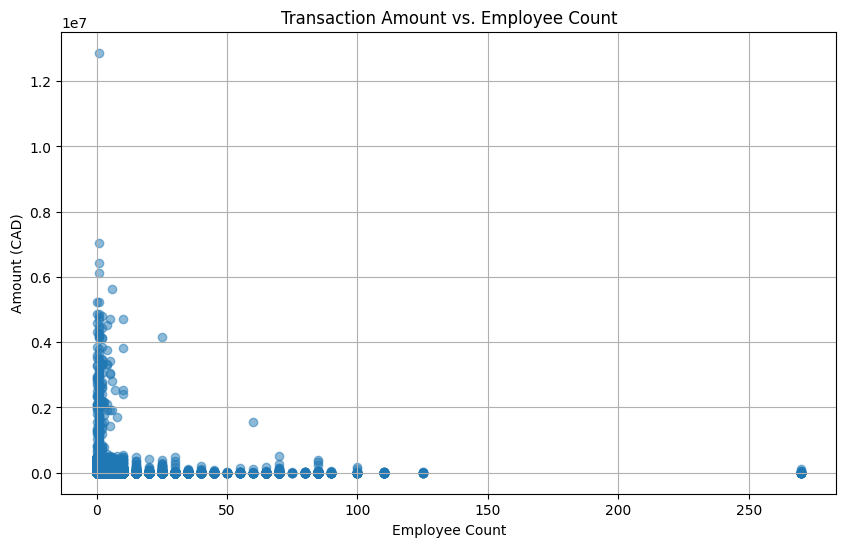

In [ ]:
# Merge the DataFrames
merged_df = pd.merge(eft, kyc, on='customer_id', how='left')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['employee_count'], merged_df['amount_cad'], alpha=0.5)
plt.xlabel('Employee Count')
plt.ylabel('Amount (CAD)')
plt.title('Transaction Amount vs. Employee Count')
plt.grid(True)
plt.show()